In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:


def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


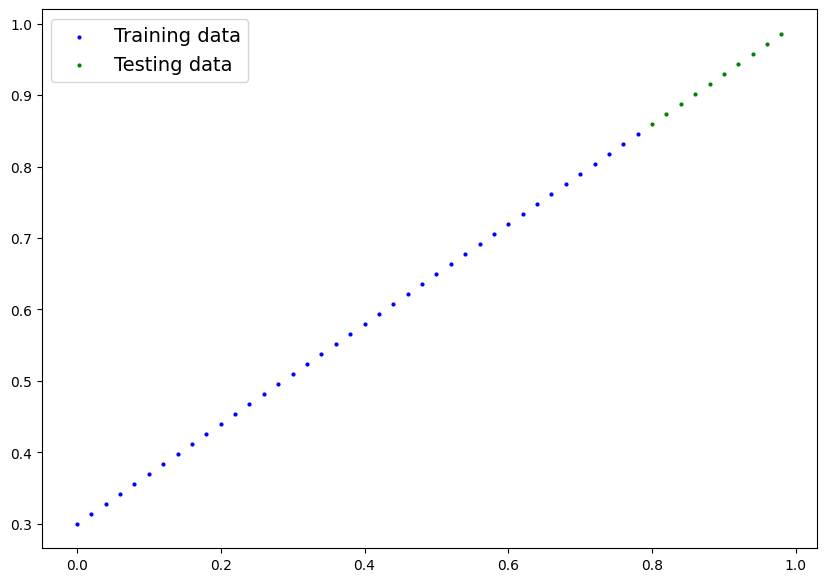

In [7]:
plot_predictions()

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
            dtype=torch.float), 
            requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, 
            dtype=torch.float), 
            requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias

In [11]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [14]:
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


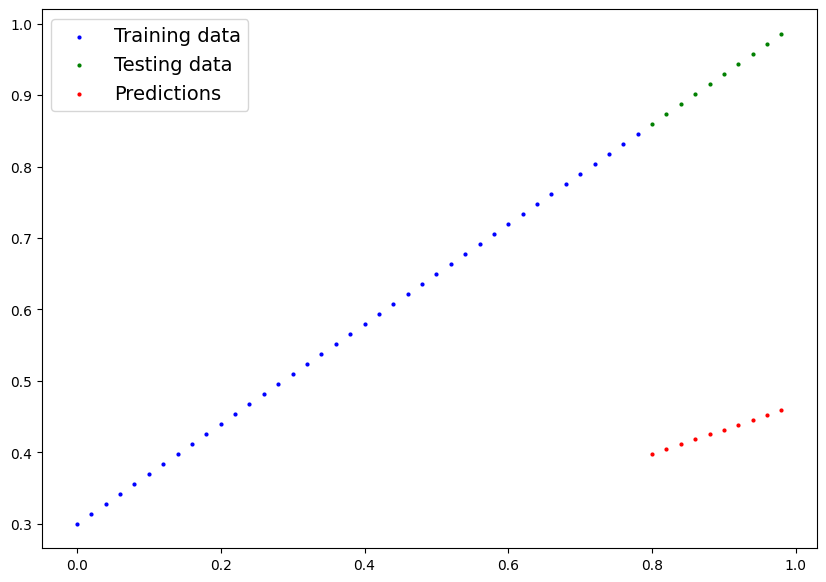

In [15]:
plot_predictions(predictions=y_preds)

In [16]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [17]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

In [24]:
epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []

# training 

for epoch in range(epochs):
    model_0.train()

    # Forward pass
    y_pred = model_0(X_train)

    # Calculate loss function
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
            
    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")




Epoch: 0 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 10 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 20 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 30 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 40 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 50 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 60 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 70 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 100 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 110 | MAE Train Loss: 0.008932481519

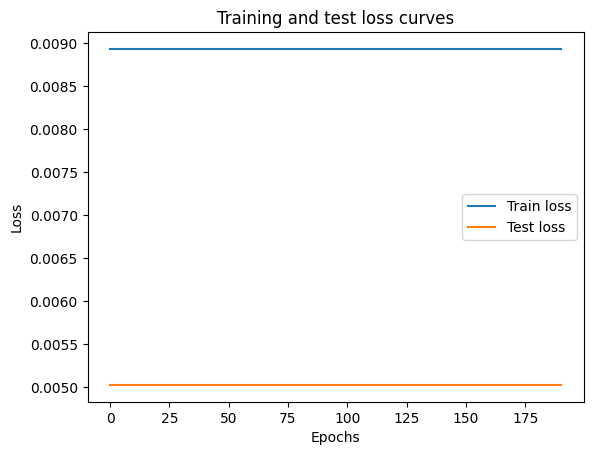

In [25]:


# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [26]:


# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")


The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [43]:
model_0.eval()

device = torch.device("mps")

with torch.inference_mode():
    model_0.to(device)
    X_test = X_test.to(device)
    y_preds = model_0(X_test)
    
y_preds = y_preds.cpu()

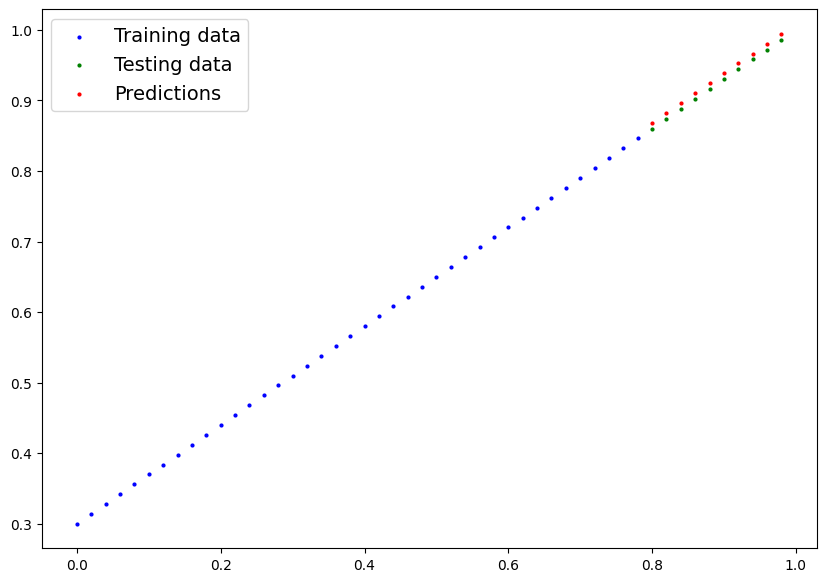

In [44]:
plot_predictions(predictions=y_preds)

In [45]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

!ls -l models/01_pytorch_workflow_model_0.pth

Saving model to: models/01_pytorch_workflow_model_0.pth
-rw-r--r--  1 seunghyunlee  staff  1680 May 16 16:56 models/01_pytorch_workflow_model_0.pth


In [47]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [51]:
loaded_model_0.eval()

device = "cpu"

with torch.inference_mode():
    model_0.to(device)
    X_test = X_test.to(device)
    loaded_model_preds = loaded_model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [53]:
device = torch.device("mps")
print(f"Using device: {device}")

Using device: mps


In [56]:
weight = 0.7
bias = 0.3

start = 0 
end = 1 
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [57]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

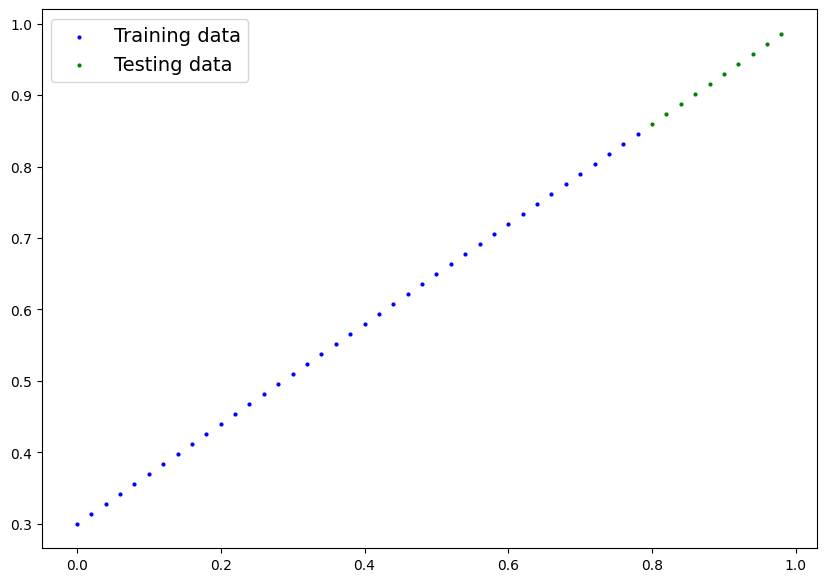

In [58]:
plot_predictions(X_train, y_train, X_test, y_test)

In [59]:
class LinRegModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinRegModelV2()
model_1, model_1.state_dict()

(LinRegModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [60]:
next(model_1.parameters()).device

device(type='cpu')

In [62]:
model_1.to(device) 
next(model_1.parameters()).device

device(type='mps', index=0)

In [63]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.01)

In [66]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if (epoch % 100 == 0): 
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.005678260233253241 | Test loss: 0.004209023900330067
Epoch: 100 | Train loss: 0.005363409407436848 | Test loss: 0.0044092475436627865
Epoch: 200 | Train loss: 0.006148508284240961 | Test loss: 0.0053164660930633545
Epoch: 300 | Train loss: 0.005600351374596357 | Test loss: 0.004682958126068115
Epoch: 400 | Train loss: 0.00594258401542902 | Test loss: 0.008656329475343227
Epoch: 500 | Train loss: 0.005134877748787403 | Test loss: 0.0041449847631156445
Epoch: 600 | Train loss: 0.0054036700166761875 | Test loss: 0.004455596208572388
Epoch: 700 | Train loss: 0.004640808794647455 | Test loss: 0.007152092643082142
Epoch: 800 | Train loss: 0.004667076747864485 | Test loss: 0.007182449102401733
Epoch: 900 | Train loss: 0.004590039141476154 | Test loss: 0.0070934235118329525


In [67]:
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6989]], device='mps:0')),
             ('linear_layer.bias', tensor([0.3076], device='mps:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [71]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
    
y_preds = y_preds.cpu()

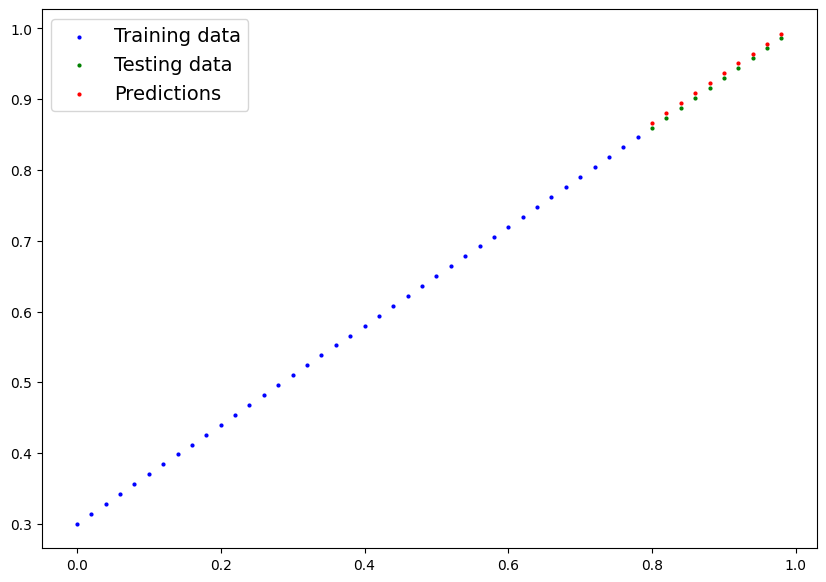

In [73]:
plot_predictions(predictions=y_preds)

In [130]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

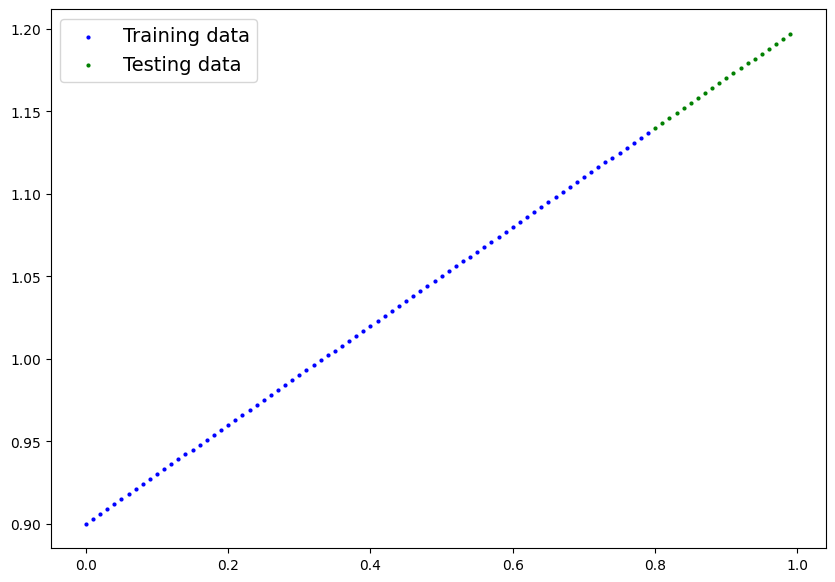

In [131]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

plot_predictions(X_train, y_train, X_test, y_test)

In [132]:
class linModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [133]:
model_test = linModel()

model_test.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.4668]])),
             ('linear_layer.bias', tensor([0.2549]))])

In [134]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_test.parameters(), lr=0.01)

In [140]:
epochs = 300

train_loss_values = []
test_loss_values = []
epoch_count = []

# training 

for epoch in range(epochs):
    model_test.train()

    # Forward Pass
    y_pred = model_test(X_train)

    # loss function 
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_test.eval()

    with torch.inference_mode():
        test_pred = model_test(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 20 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 40 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 60 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 80 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 100 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 120 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 140 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 160 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 180 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 200 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 220 | Train loss: 0.0016849630046635866 | Test loss: 0.013705044984817505
Epoch: 240 | Train loss: 0.0016849

In [141]:
model_test.eval()

print(model_test.state_dict())

with torch.inference_mode():
    y_preds = model_test(X_test)

y_preds

OrderedDict([('linear_layer.weight', tensor([[0.2963]])), ('linear_layer.bias', tensor([0.9032]))])


tensor([[1.1402],
        [1.1431],
        [1.1461],
        [1.1491],
        [1.1520],
        [1.1550],
        [1.1580],
        [1.1609],
        [1.1639],
        [1.1668],
        [1.1698],
        [1.1728],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1846],
        [1.1876],
        [1.1906],
        [1.1935],
        [1.1965]])

In [150]:
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_test.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.2963]])),
             ('linear_layer.bias', tensor([0.9032]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [151]:


from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_test.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_test.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_test.pth


In [152]:
loaded_test_model = linModel()

loaded_test_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(loaded_test_model.state_dict())

loaded_test_model.eval()

with torch.inference_mode():
    loaded_test_model_preds = loaded_test_model(X_test)

y_preds == loaded_test_model_preds

OrderedDict([('linear_layer.weight', tensor([[0.2963]])), ('linear_layer.bias', tensor([0.9032]))])


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])